In [1]:
import naive
import kdtree
import lsh
from time import time
import numpy as np
import matplotlib.pyplot as plt

(array([ 1.,  2.,  3., 10., 11., 14., 15., 16., 17., 18., 19., 26.]), array([  3, 214, 389, 230, 124,   2,   9,   5,   2,  19,   2,   1],
      dtype=int64))


In [2]:
model1 = naive.Naive()
model2 = kdtree.knn_kdtree()
model3 = lsh.knn_lsh()

In [3]:
def time_N(model, k:int, iter:int, *args) :
    n, d = 100000, 50
    train_time = []
    test_time = []
    x = []
    while n < 1000000 :
        data = np.random.randint(1000, size=(n,d))
        for i in range(iter) :
            st = time()
            model.train(data, *args)
            end = time()
        train_time.append((end-st)/iter)
        for i in range(iter) :
            st = time()
            model.predict(k, data[0])
            end = time()
        test_time.append((end-st)/iter)
        x.append(n)
        n += 100000
    return x, train_time, test_time

In [4]:
x, naive_train, naive_test = time_N(model1, 5, 10)

In [5]:
x, kdtree_train, kdtree_test = time_N(model2, 5, 5, 40)

In [6]:
x, lsh_train, lsh_test = time_N(model3, 5, 5, 5)

In [7]:
def plot_time(type, x, time_naive, time_kd, time_lsh, variable, fixed , value) :
    plt.plot(x, time_naive, x, time_kd, x, time_lsh)
    plt.legend(['naive', 'kd tree', 'lsh'])
    plt.title(f'{type} time v/s {variable}, {fixed} = {value}')
    plt.ylabel('Time')
    plt.xlabel(f'{variable}')
    plt.show()

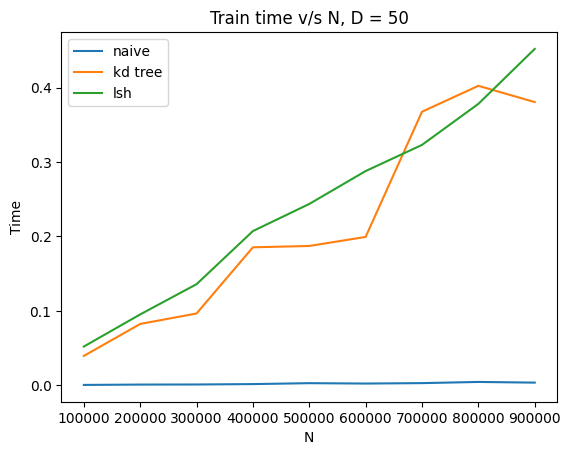

In [8]:
plot_time('Train', x, naive_train, kdtree_train, lsh_train, 'N', 'D', 50)

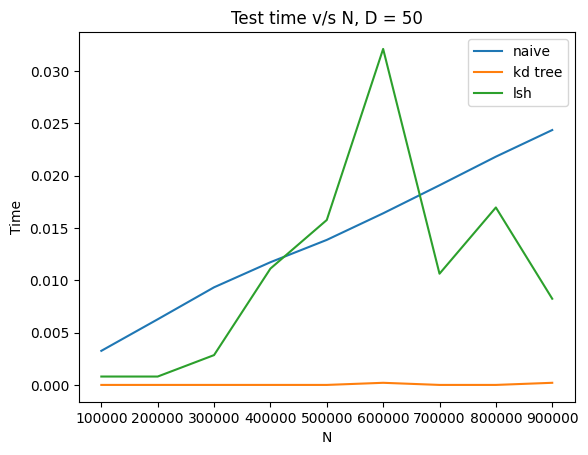

In [9]:
plot_time('Test', x, naive_test, kdtree_test, lsh_test, 'N', 'D', 50)

In [10]:
def time_D(model, k, iter, *args) :
    n, d = 10000, 100
    train_time = []
    test_time = []
    x = []
    while d < 1000 :
        data = np.random.randint(1000, size=(n,d))
        for i in range(iter) :
            st = time()
            model.train(data, *args)
            end = time()
        train_time.append((end-st)/iter)
        for i in range(iter) :
            st = time()
            model.predict(k, data[0])
            end = time()
        test_time.append((end-st)/iter)
        x.append(d)
        d += 100
    return x, train_time, test_time

In [11]:
x, naive_train, naive_test = time_D(model1, 5, 100)

In [12]:
x, kdtree_train, kdtree_test = time_D(model2, 5, 100, 40)

In [13]:
x, lsh_train, lsh_test = time_D(model3, 5, 100, 10)

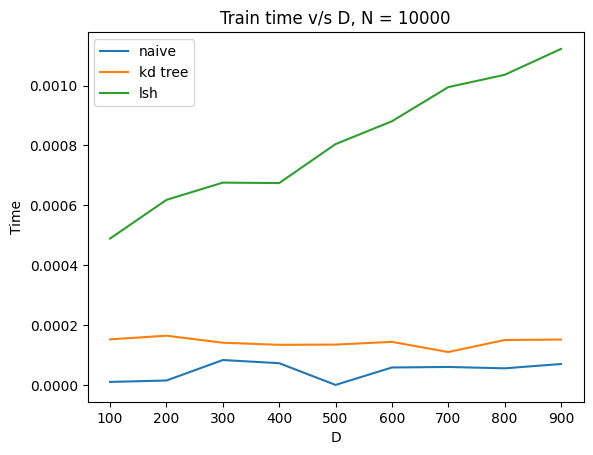

In [14]:
plot_time('Train', x, naive_train, kdtree_train, lsh_train,"D",'N',10000)

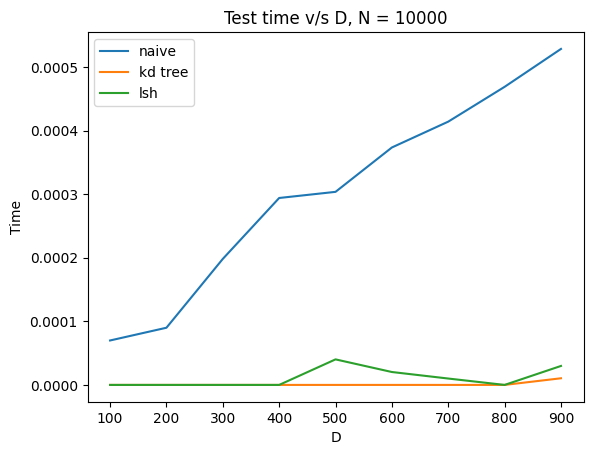

In [15]:
plot_time('Test', x, naive_test, kdtree_test, lsh_test,"D",'N',10000)

In [16]:
def create_grid():
    x = np.arange(0, 1000, 1)
    y = np.arange(0, 1000, 1)
    grid = np.zeros((1000000, 2))
    for i in x :
        for j in y :
            grid[1000*i+j] = [i, j]
    return grid

In [115]:
data = np.random.randint(1000, size=(1000, 2))
na = naive.Naive()
kd = kdtree.knn_kdtree()
l = lsh.knn_lsh()

In [116]:
na.train(data)
kd.train(data, 40)
l.train(data, 5)

In [117]:
knn_na = na.predict(5,data[0])
knn_kd = kd.predict(5,data[0])
knn_l = l.predict(5,data[0])

In [60]:
grid = create_grid()

In [61]:
z = np.zeros(1000000)
t = kd.tree
arr = t.arr
for i in range(1000000) :
    j = 0
    while t.isleaf[j] == 0 :
        if (grid[i][int(t.arr[j][0])] < t.arr[j][1]) :
            j = 2*j+1
        else :
            j = 2*j+2
    z[i] = j

Text(0.5, 1.0, 'Partition of KD Tree')

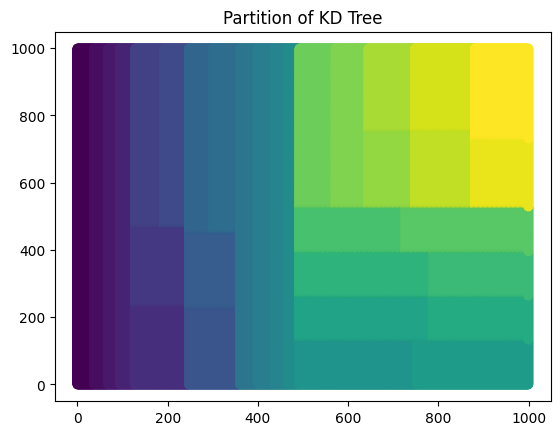

In [62]:
f = plt.figure()
plt.scatter(grid[:,0], grid[:,1], c = z)
plt.title("Partition of KD Tree")

In [118]:
knn_na, knn_kd, knn_l = np.sort(knn_na), np.sort(knn_kd), np.sort(knn_l)

In [119]:
arr1 = np.where(knn_na == knn_kd)
arr2 = np.where(knn_na != knn_kd)

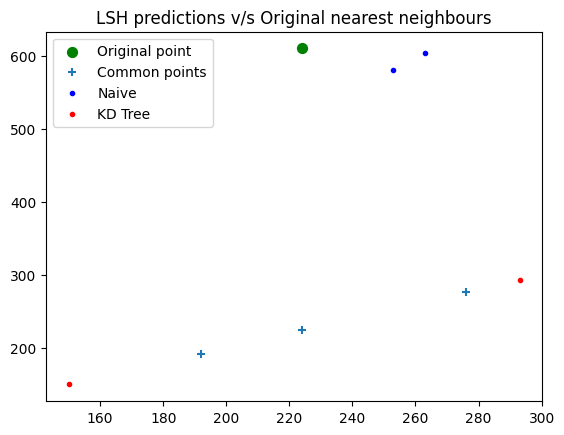

In [120]:
f = plt.figure()
plt.scatter(data[0][0], data[0][1], s=50, c='green')
plt.scatter(data[knn_na[arr1]][:,0], data[knn_na[arr1]][:,0], marker='+')
plt.scatter(data[knn_na[arr2]][:,0], data[knn_na[arr2]][:,1], c='blue',marker='.')
plt.scatter(data[knn_kd[arr2]][:,0], data[knn_kd[arr2]][:,0], c='red',marker='.')
plt.title('LSH predictions v/s Original nearest neighbours')
plt.legend(['Original point', 'Common points', 'Naive', 'KD Tree'])

In [88]:
arr1 = np.where(knn_na == knn_l)
arr2 = np.where(knn_na != knn_l)

(array([0], dtype=int64),)